<a href="https://colab.research.google.com/github/19PA1A0493/CKD/blob/main/CKD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import glob 
from keras.models import Sequential,load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import matplotlib.pyplot as plt
import keras as k


In [10]:
df = pd.read_csv('/content/chronic  kidney.csv.csv')
df.head(5)


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [11]:
df.shape


(400, 26)

In [12]:
columns_to_retain = ['sg','al','sc','hemo','pcv','wbcc','rbcc','htn','classification']
df = df.drop( [col for col in df.columns if not col in columns_to_retain] , axis=1 )
df = df.dropna(axis=0)



In [13]:
for column in df.columns:
    if df[column].dtype == np.number:
      continue
    df[column] = LabelEncoder().fit_transform( df[column] )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  


In [15]:
df.head()


,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


In [16]:
x = df.drop(['classification'],axis=1)
y = df['classification']



In [17]:
x_scaler = MinMaxScaler()
x_scaler.fit(x)
column_names = x.columns
x[column_names] = x_scaler.transform(x)



In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=True)


In [19]:

model = Sequential()
model.add( Dense(256, input_dim= len(x.columns), kernel_initializer=k.initializers.random_normal(seed=13), activation='relu'))
model.add( Dense(1, activation='hard_sigmoid'))



In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [21]:
history = model.fit(x_train, y_train, epochs=2000, batch_size= x_train.shape[0])


Epoch 1/2000
1/1 [==============================] - 1s 1s/step - loss: 0.6903 - accuracy: 0.5328
Epoch 2/2000
1/1 [==============================] - 0s 15ms/step - loss: 0.6830 - accuracy: 0.5328
Epoch 3/2000
1/1 [==============================] - 0s 22ms/step - loss: 0.6758 - accuracy: 0.9520
Epoch 4/2000
1/1 [==============================] - 0s 23ms/step - loss: 0.6687 - accuracy: 0.9258
Epoch 5/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.6618 - accuracy: 0.9214
Epoch 6/2000
1/1 [==============================] - 0s 19ms/step - loss: 0.6549 - accuracy: 0.9170
Epoch 7/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.6481 - accuracy: 0.9039
Epoch 8/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.6414 - accuracy: 0.8777
Epoch 9/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.6348 - accuracy: 0.8690
Epoch 10/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.6283 - accuracy: 0.8690
Epoch 11/20

In [22]:


model.save('ckd.model')


Text(0.5, 0, 'epoch')

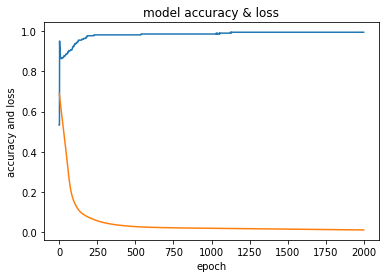

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy & loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')



In [24]:
print('shape of traning data:',x_train.shape)
print('shape of test data:',x_test.shape)


shape of traning data: (229, 6)
shape of test data: (58, 6)


In [25]:
pred = model.predict(x_test)
pred = [1 if y>=0.5 else 0 for y in pred]
pred
print('Original : {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted : {0}'.format(", ".join(str(x) for x in pred)))


2/2 [==============================] - 0s 8ms/step
Original : 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1
Predicted : 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1


In [26]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [27]:
knn_acc = accuracy_score(y_test, knn.predict(x_test))



In [28]:
print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(x_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")


Training Accuracy of KNN is 0.9912663755458515
Test Accuracy of KNN is 1.0 



In [29]:
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(x_test))}")


Confusion Matrix :- 
[[33  0]
 [ 0 25]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        25

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [30]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)


DecisionTreeClassifier()

In [31]:
# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))


In [32]:
print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")


Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 1.0 



In [33]:
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(x_test))}")


Confusion Matrix :- 
[[33  0]
 [ 0 25]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        25

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [34]:

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)


DecisionTreeClassifier()

In [35]:
# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))


In [36]:
print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")


Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 1.0 



In [37]:
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(x_test))}")


Confusion Matrix :- 
[[33  0]
 [ 0 25]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        25

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [38]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(x_train, y_train)


LGBMClassifier(learning_rate=1)

In [39]:
# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(x_test))



In [40]:

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(x_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")


Training Accuracy of LGBM Classifier is 1.0
Test Accuracy of LGBM Classifier is 1.0 



In [41]:
print(f"{confusion_matrix(y_test, lgbm.predict(x_test))}\n")
print(classification_report(y_test, lgbm.predict(x_test)))


[[33  0]
 [ 0 25]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        25

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [42]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'LGBM Classifier'],
    'Score' : [knn_acc, dtc_acc, lgbm_acc]
})

In [43]:
models.sort_values(by = 'Score', ascending = False)


,Model,Score
0,KNN,1.0
1,Decision Tree Classifier,1.0
2,LGBM Classifier,1.0


In [45]:

from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130)

In [47]:
# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(x_test))

In [49]:
print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(x_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")




Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 1.0 

